<a href="https://colab.research.google.com/github/shajaraliniyazi/Sentiment-analysis-/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv(
    "IMDB Dataset.csv",
                 # ignore quotes
    on_bad_lines="skip",   # skip problematic rows
    engine="python"        # more tolerant parser
)


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(5504, 2)

In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df.info() ## check whether the value is missing or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5504 non-null   object
 1   sentiment  5504 non-null   object
dtypes: object(2)
memory usage: 86.1+ KB


In [ ]:
df.duplicated().sum()  ## 418 duplicated files

np.int64(3)

In [ ]:
df=df.drop_duplicates()


In [ ]:
df.info() ## duplicate removes

<class 'pandas.core.frame.DataFrame'>
Index: 5501 entries, 0 to 5503
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5501 non-null   object
 1   sentiment  5501 non-null   object
dtypes: object(2)
memory usage: 128.9+ KB


In [ ]:
df=df.iloc[:10000]

In [ ]:
## cleaning
import warnings
warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)

In [ ]:
df['review'] =df['review'].str.lower() ## step 1

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
df['review']=df['review'].str.strip()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
## remove html tags
df['review'] = df['review'].str.replace(r'<.*?>', '', regex=True)

In [ ]:
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'', regex=True) ## remove urls

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+")]  # no urls

,review,sentiment


In [ ]:
## expending abbreviation

In [ ]:
import re

In [ ]:
def remove_abb(data):

    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data = re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'1l", "it will", data)
    data = re.sub(r"we'1l", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'11", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'11", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûª11", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'11", "I will", data)
    data = re.sub(r"doesn't", "does npt",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'11", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'11", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)

    return data

In [ ]:
df['review']=df['review'].apply(remove_abb)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
## spelling corrections
# First, install the textblob package
!pip install textblob

# Then import it
from textblob import TextBlob


In [ ]:
from textblob import TextBlob

In [ ]:
def spell_check(text):
    return TextBlob(text).correct().string

In [ ]:
df['review']=df['review'].apply(spell_check)

KeyboardInterrupt: 

In [ ]:
 ## remove Punctuation
import string


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')

    return text



In [ ]:
df['review']=df['review'].apply(remove_punctuation)


In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
## remove special characters

In [ ]:
df['review']=df['review'].str.replace('[^\W\s]','')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-1600270708.py:1: SyntaxWarning: invalid escape sequence '\W'
  df['review']=df['review'].str.replace('[^\W\s]','')


In [ ]:
## cleaning is done

In [ ]:
## preprocessig

In [ ]:
# tokenization ( keep string)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
df['review_new']=df['review'].apply(word_tokenize)

In [ ]:
df ## result

,review,sentiment,review_new
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."
...,...,...,...
5499,the people at abc forgot to do their biographi...,negative,"[the, people, at, abc, forgot, to, do, their, ..."
5500,it is hard to screw up this story great book ...,negative,"[it, is, hard, to, screw, up, this, story, gre..."
5501,this movie has some of the most awesome cars I...,negative,"[this, movie, has, some, of, the, most, awesom..."
5502,okay for the most part and all its cheesiness ...,negative,"[okay, for, the, most, part, and, all, its, ch..."


In [ ]:
## stop word removel ( are thoese word that help in sentence framing but not have a sementic meaning like is, of, the, so we are going to remove this)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
def remove_stopwords(text):
    l = []
    for i in text:
        if i not in stopwords.words('english'):
            l.append(i)
    return l

In [ ]:
df['review_new']=df['review_new'].apply(remove_stopwords)

In [ ]:
## EDA and feature engineering

In [ ]:
df.head()

,review,sentiment,review_new
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [ ]:
df['review']=df['review_new'].apply(lambda x:" ".join(x))

In [ ]:
df

,review,sentiment,review_new
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."
...,...,...,...
5499,people abc forgot biographical research many s...,negative,"[people, abc, forgot, biographical, research, ..."
5500,hard screw story great book good film version ...,negative,"[hard, screw, story, great, book, good, film, ..."
5501,movie awesome cars I ever seen movie definitel...,negative,"[movie, awesome, cars, I, ever, seen, movie, d..."
5502,okay part cheesiness movie actually pretty goo...,negative,"[okay, part, cheesiness, movie, actually, pret..."


In [ ]:
##EDA

In [ ]:
df['char_length']=df['review'].str.len()

In [ ]:
df['word_length'] = df['review_new'].apply(len)

In [ ]:
df

,review,sentiment,review_new,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1152,168
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
...,...,...,...,...,...
5499,people abc forgot biographical research many s...,negative,"[people, abc, forgot, biographical, research, ...",484,75
5500,hard screw story great book good film version ...,negative,"[hard, screw, story, great, book, good, film, ...",500,78
5501,movie awesome cars I ever seen movie definitel...,negative,"[movie, awesome, cars, I, ever, seen, movie, d...",1007,165
5502,okay part cheesiness movie actually pretty goo...,negative,"[okay, part, cheesiness, movie, actually, pret...",875,139


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

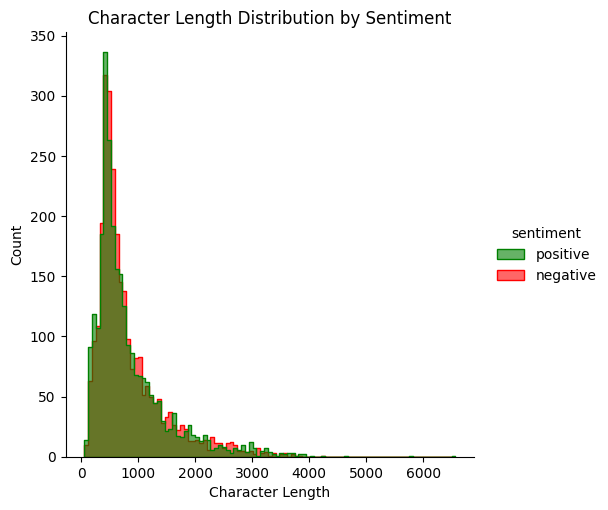

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# one displot with hue
sns.displot(
    data=df,
    x="char_length",
    hue="sentiment",       # separate by sentiment
    kind="hist",           # histogram
    element="step",        # optional: outline style
    palette={"positive": "green", "negative": "red"},  # custom colors
    alpha=0.6              # transparency
)

plt.xlabel("Character Length")
plt.ylabel("Count")
plt.title("Character Length Distribution by Sentiment")
plt.show()

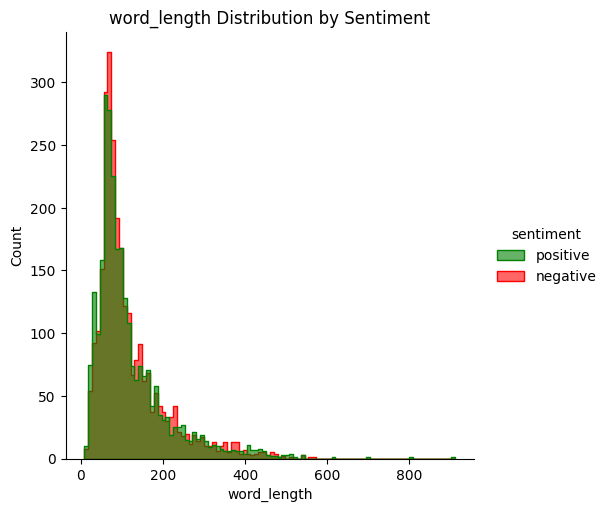

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# one displot with hue
sns.displot(
    data=df,
    x="word_length",
    hue="sentiment",       # separate by sentiment
    kind="hist",           # histogram
    element="step",        # optional: outline style
    palette={"positive": "green", "negative": "red"},  # custom colors
    alpha=0.6              # transparency
)

plt.xlabel("word_length")
plt.ylabel("Count")
plt.title("word_length Distribution by Sentiment")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# ngrams analysis
## trigram  [ combination of three words ]

from nltk import ngrams

pd.Series(ngrams(df['review_new'].sum(),3)).value_counts()

,count
"(I, ever, seen)",94
"(worst, movie, ever)",44
"(one, worst, movies)",34
"(I, would, like)",32
"(movie, ever, seen)",28
...,...
"(dismember, mama, fame)",1
"(mama, fame, find)",1
"(fame, find, trapped)",1
"(find, trapped, small)",1


In [ ]:
# ngrams analysis

## trigram  [ combination of three words ]

from nltk import ngrams

pd.Series(ngrams(df[df['sentiment'] == 'negative']['review_new'].sum(),3)).value_counts()

,count
"(I, ever, seen)",63
"(worst, movie, ever)",44
"(one, worst, movies)",34
"(worst, movies, ever)",25
"(waste, time, money)",21
...,...
"(randy, quaid, brian)",1
"(performers, randy, quaid)",1
"(older, performers, randy)",1
"(exception, older, performers)",1


In [ ]:
pd.Series(ngrams(df[df['sentiment'] == 'positive']['review_new'].sum(),3)).value_counts()

,count
"(I, ever, seen)",31
"(world, war, ii)",19
"(would, like, see)",18
"(I, would, like)",16
"(would, love, see)",15
...,...
"(film, say, small)",1
"(small, film, say)",1
"(great, small, film)",1
"(one, great, small)",1


In [ ]:
pd.Series(ngrams(df[df['sentiment'] == 'negative']['review_new'].sum(),2)).value_counts()

,count
"(waste, time)",166
"(ever, seen)",165
"(special, effects)",158
"(I, would)",148
"(looks, like)",145
...,...
"(bomb, insane)",1
"(even, war)",1
"(war, instinct)",1
"(instinct, selfpreservation)",1


In [ ]:
pd.Series(ngrams(df[df['sentiment'] == 'positive']['review_new'].sum(),2)).value_counts()

,count
"(one, best)",177
"(I, would)",129
"(I, seen)",117
"(even, though)",105
"(ever, seen)",92
...,...
"(cinematography, intimate)",1
"(intimate, astoundingly)",1
"(beautiful, narrative)",1
"(narrative, intricately)",1


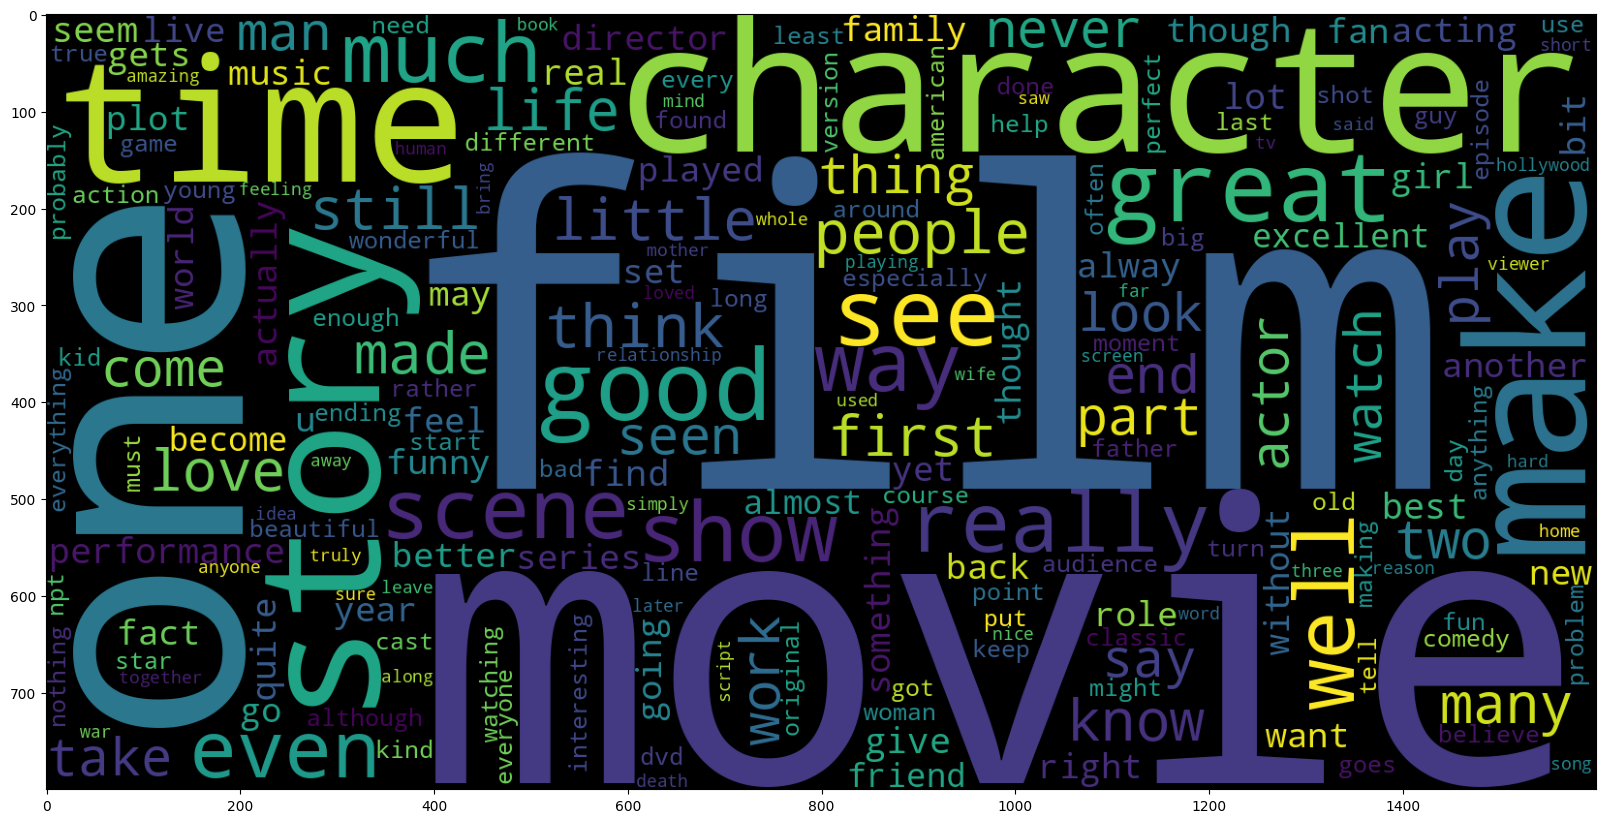

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height =800).generate("".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

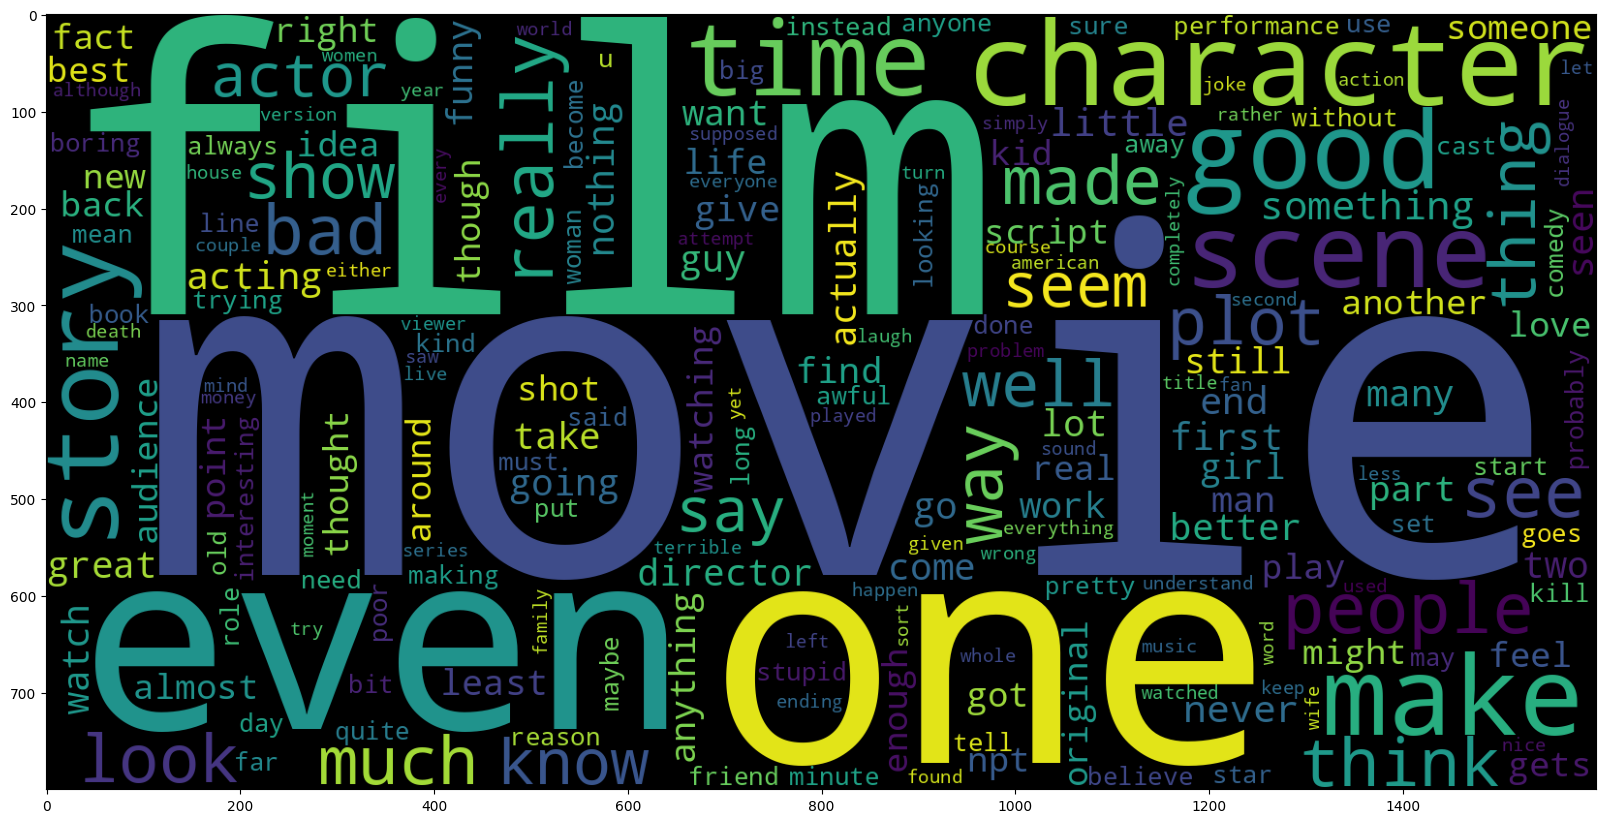

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height =800).generate("".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(2,2))
bag_of_words = count_vectorizer.fit_transform(df['review'])

# Use the new method
bag_of_words = pd.DataFrame(
    bag_of_words.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)


In [ ]:
bag_of_words

,10 10,10 15,10 lines,10 minutes,10 stars,10 year,10 years,100 greatest,100 times,100 years,...,young men,young people,young son,young woman,young women,younger brother,younger sister,zodiac killer,zombie movie,zombie movies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5497,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(bag_of_words.values)

In [ ]:
pca_result

array([[-1.41815624e-03, -2.19380711e-02, -1.63379031e-01],
       [-1.54352953e-03, -2.16831714e-02, -1.78617432e-01],
       [-3.29764786e-04, -2.21186664e-02, -1.47100061e-01],
       ...,
       [-2.73862815e-02, -1.86696646e-02,  9.92303599e-01],
       [-9.56646262e-03, -1.41115872e-02,  7.61318836e-02],
       [-2.22014674e-03, -2.04481127e-02, -1.04170536e-01]])

In [ ]:
import seaborn as sns

In [ ]:
sns.displot()